<a href="https://colab.research.google.com/github/lmquann/leminhquan/blob/main/T%E1%BB%91i_%C6%B0u_h%C3%B3a_m%C3%B4_h%C3%ACnh_ph%C3%A2n_lo%E1%BA%A1i_th%E1%BB%9Di_trang___L%C3%AA_Minh_Qu%C3%A2n___21E1020018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/leanhducprovn/cdn/blob/master/tlu/elearning/machine-learning/fashion-mnist/fashion-mnist.ipynb)

## Classify Fashion-MNIST (phân loại thời trang)

### Tổng quan

**Fashion MNIST** là tập dữ liệu được dùng để thay thế cho tập dữ liệu **MNIST kinh điển** thường dùng cho các chương trình "Hello, World" của machine learning trong lĩnh vực thị giác máy tính. Tập dữ liệu kinh điển vừa đề cập gồm ảnh của các con số (ví dụ 0, 1, 2) được viết tay. Các ảnh này có cùng định dạng tệp và độ phân giải với các ảnh về quần áo và giầy dép chúng ta sắp dùng.

Với tập dữ liệu này, **60.000** ảnh sẽ được dùng để huấn luyện và **10.000** ảnh sẽ thường dùng để đánh giá khả năng phân loại nhận diện ảnh của mạng neuron.

Mỗi ảnh là một mảng NumPy 2 chiều, 28x28, với mỗi pixel có giá trị từ 0 đến 255.

<table>
  <tr>
    <td>
      <img src="https://cdn.leanhduc.pro.vn/tlu/elearning/machine-learning/fashion-mnist/fashion-mnist.png" alt="Fashion MNIST"  width="100%">
    </td>
  </tr>
  <tr>
    <td align="center">
      <b>Figure 1.</b> <a href="https://github.com/leanhducprovn/cdn/tree/master/tlu/elearning/machine-learning">Fashion-MNIST samples</a>
    </td>
  </tr>
</table>

#### Mô tả nhãn
Nhãn là một mảng của các số nguyên từ 0 đến 9, tương ứng với mỗi lớp quần áo giày dép:
<table align="left">  
	<tr><th>STT</th><th>Tên</th></tr>  
	<tr>
		<td>0</td>
		<td>T-shirt/top</td>
	</tr>
	<tr>
		<td>1</td>
		<td>Trouser</td>
	</tr>
	<tr>
		<td>2</td>
		<td>Pullover</td>
	</tr>
	<tr>
		<td>3</td>
		<td>Dress</td>
	</tr>
	<tr>
		<td>4</td>
		<td>Coat</td>
	</tr>
	<tr>
		<td>5</td>
		<td>Sandal</td>
	</tr>
	<tr>
		<td>6</td>
		<td>Shirt</td>
	</tr>
	<tr>
		<td>7</td>
		<td>Sneaker</td>
	</tr>
	<tr>
		<td>8</td>
		<td>Bag</td>
	</tr>
	<tr>
		<td>9</td>
		<td>Ankle boot</td>
	</tr>
</table>

### Import thư viện

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Trực quan hóa dữ liệu

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
Train set: 60000
Test set: 10000
y = 2 Pullover


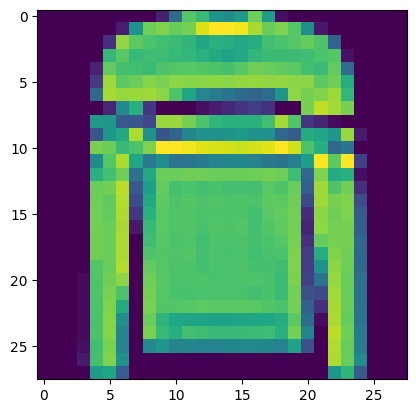

In [15]:
# Tải dữ liệu thời trang
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# In hình dạng tập huấn luyện
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# In số lượng tập dữ liệu đào tạo và kiểm tra
print('Train set:', x_train.shape[0])
print('Test set:', x_test.shape[0])

# Xác định các nhãn
fashion_mnist_labels = [
  "T-shirt/top",  # index 0
  "Trouser",      # index 1
  "Pullover",     # index 2
  "Dress",        # index 3
  "Coat",         # index 4
  "Sandal",       # index 5
  "Shirt",        # index 6
  "Sneaker",      # index 7
  "Bag",          # index 8
  "Ankle boot"    # index 9
]

# Chọn bất kỳ 1 số trong khoảng từ 0 đến 59,999
img_index = 5

# y_train chứa các nhãn, từ 0 đến 9 (index 0 -> 9 tương ứng với mỗi loại fashion)
label_index = y_train[img_index]

# In nhãn, ví dụ nhãn thứ 2 là Pullover (áo phông)
print("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# Hiển thị một trong những hình ảnh từ tập dữ liệu đào tạo
plt.imshow(x_train[img_index])

### Chuẩn hoá dữ liệu

Chuẩn hóa các dữ liệu để chúng có cùng tỷ lệ. Ở đây, `x_train`, `x_test` mang các giá trị nguyên từ 0 đến 255.

In [16]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
print("Số lượng dữ liệu train: " + str(len(x_train)))
print("Số lượng dữ liệu test: " + str(len(x_test)))

Số lượng dữ liệu train: 60000
Số lượng dữ liệu test: 10000


### Chia dữ liệu thành các tập dữ liệu


In [18]:
# Chia nhỏ dữ liệu thành các tập huấn luyện
# Trích từ tập training data ra một tập con nhỏ và thực hiện việc đánh giá mô hình trên tập con nhỏ này. Tập con nhỏ được trích ra từ training set này được gọi là validation set
# Đặt 5000 vào validation set và giữ 55.000 còn lại cho training set
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Định hình lại dữ liệu đầu vào từ (28, 28) thành (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# In tập huấn luyện
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# In số lượng tập dữ liệu of training, validation, and test datasets
print('Train set:', x_train.shape[0])
print('Validation set:', x_valid.shape[0],)
print('Test set:', x_test.shape[0],)

x_train shape: (55000, 28, 28, 1)
y_train shape: (55000, 10)
Train set: 55000
Validation set: 5000
Test set: 10000


### Xây dựng mô hình



Em sử dụng mô hình **Sequential model API** với một số API Keras sau:

* [Conv2D()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/): Là convolution layer dùng để lấy feature từ image.
* [Pooling()](https://keras.io/layers/pooling/): Chứa các layer dùng trong mạng
* [Dropout()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout): Hạn chế overfiting






In [19]:
# Khởi tạo models Sequential()
model = tf.keras.Sequential()

# Xác định hình dạng đầu vào trong lớp đầu tiên của neural network
# Tạo Convolutionnal Layers: Conv2D là convolution dùng để lấy feature từ ảnh với các tham số
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
# Hàm MaxPooling2D hoặc AvergaPooling1D, 2D (lấy max , trung bình) với từng size.
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# Dropout: chống over-fitting
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# Flatten dùng để lát phằng layer để fully connection (ví dụ: shape: 28x28 qua layer này sẽ là 784x1)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Bảng tóm tắt mô hình
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

### Biên dịch mô hình

Cấu hình quy trình huấn luyện với **compile() API** trước khi huấn luyện mô hình.

In [20]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Huấn luyện mô hình

Huấn luyện mô hình với **fit() API**.

Sử dụng [ModelCheckpoint API](https://keras.io/callbacks/#modelcheckpoint) để lưu mô hình sau mỗi epoch. Đặt `save_best_only = True` để chỉ lưu khi độ chính xác của validation set được cải thiện.

In [21]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(
    filepath='model.weights.best.hdf5',
    verbose = 1,
    save_best_only = True
)


model.fit(
    x_train,
    y_train,
    batch_size = 100,
    epochs = 20,
    validation_data=(x_valid, y_valid),
    callbacks=[checkpointer]
)

Epoch 1/20
550/550 [==============================] - ETA: 0s - loss: 0.6330 - accuracy: 0.7668
Epoch 1: val_loss improved from inf to 0.39601, saving model to model.weights.best.hdf5
550/550 [==============================] - 68s 122ms/step - loss: 0.6330 - accuracy: 0.7668 - val_loss: 0.3960 - val_accuracy: 0.8604
Epoch 2/20
550/550 [==============================] - ETA: 0s - loss: 0.4288 - accuracy: 0.8451
Epoch 2: val_loss improved from 0.39601 to 0.33414, saving model to model.weights.best.hdf5
550/550 [==============================] - 64s 116ms/step - loss: 0.4288 - accuracy: 0.8451 - val_loss: 0.3341 - val_accuracy: 0.8820
Epoch 3/20
550/550 [==============================] - ETA: 0s - loss: 0.3838 - accuracy: 0.8608
Epoch 3: val_loss improved from 0.33414 to 0.31025, saving model to model.weights.best.hdf5
550/550 [==============================] - 65s 118ms/step - loss: 0.3838 - accuracy: 0.8608 - val_loss: 0.3102 - val_accuracy: 0.8890
Epoch 4/20
550/550 [==================

### Tải mô hình với validation tốt nhất

In [10]:
model.load_weights('model.weights.best.hdf5')

### Dự đoán

In ra 15 hình ảnh từ tập dữ liệu test set và đặt tiêu đề với dự đoán. Nếu dự đoán đúng (giống nhãn), thì tiêu đề sẽ có màu xanh và ngược lại là màu đỏ.

313/313 [==============================] - 5s 15ms/step


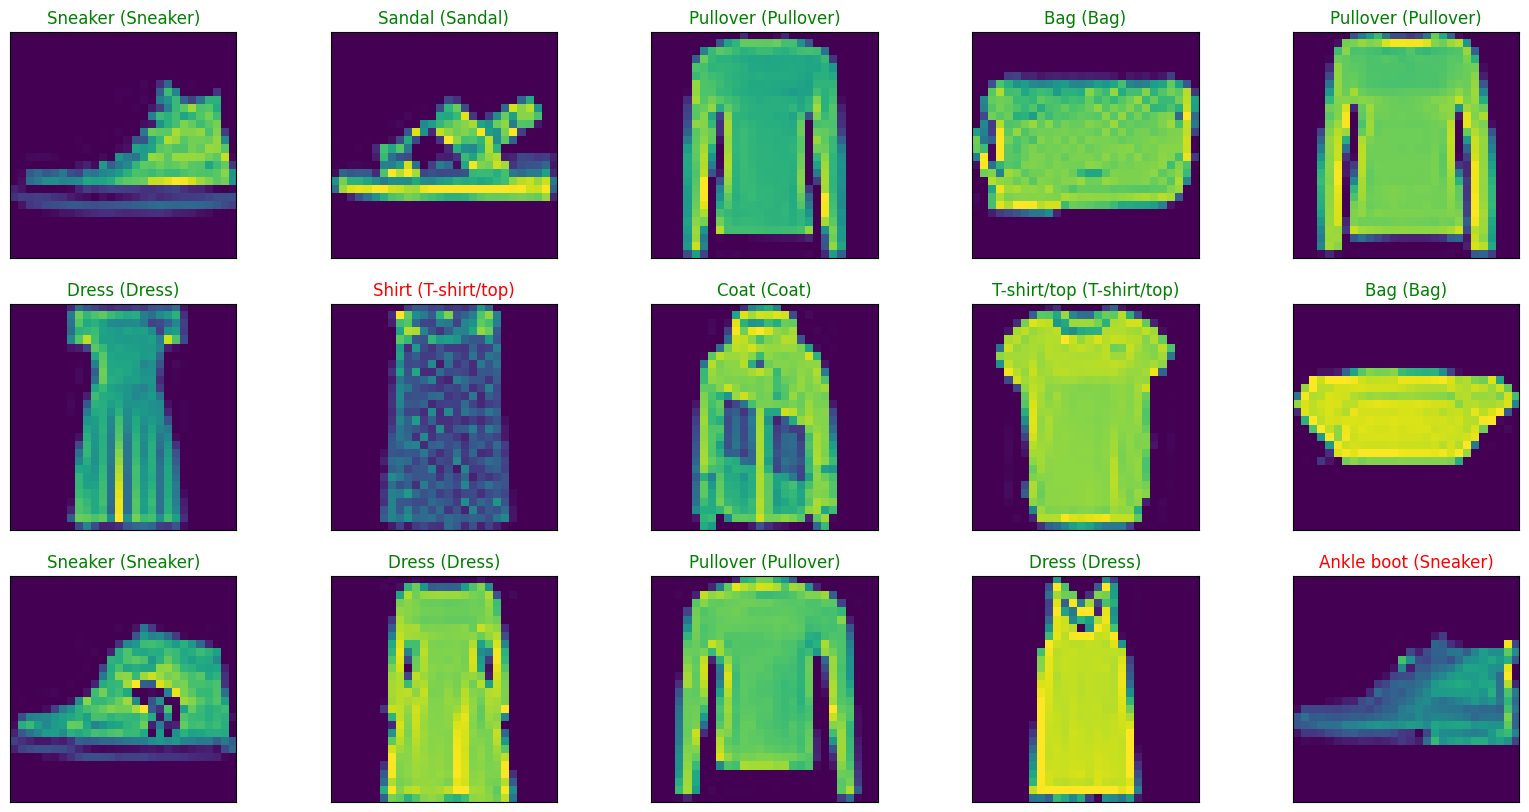

In [12]:
# Kiểm tra mô hình bằng cách sử dụng model.predict dữ liệu thử nghiệm
y_check = model.predict(x_test)

# Lấy ngẫu nhiên 15 hình ảnh từ tập test để dự đoán
figure = plt.figure(figsize=(20,10)) # Đặt kích thức hình ảnh
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)): # ramdom 15 ảnh từ tập dữ liệu test
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    # Hiển thị từng hình ảnh
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_check[index])
    true_index = np.argmax(y_test[index])

    # Đặt tiêu đề cho mỗi hình ảnh
    ax.set_title("{} ({})".format(
        fashion_mnist_labels[predict_index],
        fashion_mnist_labels[true_index]),
        color=("green" if predict_index == true_index else "red")
    )

### Kiểm tra độ chính xác

In [13]:
# Đánh giá mô hình trên test set
score = model.evaluate(x_test, y_test, verbose=0)

# Kiểm tra độ chính xác
print("Test loss:", score[0])
print("Test accuracy:", score[1])



Test loss: 0.22986018657684326
Test accuracy: 0.917900025844574


Đến thời điểm này, chúng ta thấy rằng độ accuracy của mô hình, khi đánh giá bằng tập kiểm thử, hơi thấp hơn so với số liệu trong quá trình huấn luyện. Khoảng cách giữa hai độ accuracy khi huấn luyện và khi kiểm thử thể hiện sự overfitting. Overfitting xảy ra khi một mô hình ML hoạt động kém hơn khi được cung cấp các đầu vào mới, mà mô hình chưa từng thấy trước đây trong quá trình đào tạo.

### Kết luận

Huấn luyện thành công Convolutional Neural Network (CNN) để phân loại Fashion-MNIST với độ chính xác khoảng 92%